In [1]:
# so among the most common supervised learning tasks, after regression(can use many different algorithms), here comes 
# classification systems

In [2]:
# MNIST DATASET

In [3]:
from sklearn.datasets import fetch_openml
mnist=fetch_openml('mnist_784',version=1)
mnist.keys()

dict_keys(['data', 'target', 'frame', 'categories', 'feature_names', 'target_names', 'DESCR', 'details', 'url'])

In [4]:
print(type(mnist.data))
print(type(mnist.target))
print(type(mnist.data.dtypes)) # float64
print(type(mnist.target.dtypes)) # strings

<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.series.Series'>
<class 'pandas.core.series.Series'>
<class 'pandas.core.dtypes.dtypes.CategoricalDtype'>


In [5]:
# so the dataset is basically pandas dataframe and can be used using data attribute of the mnist class


In [6]:
# the datasets included using scikit learn generally have the same kind of dictionary structure including
# a desc key describing the dataset
# a data key containing an array with one row per instance and one column per feature
# a target key containing an array with the labels 

In [7]:
X,y=mnist["data"],mnist["target"]
X.shape

(70000, 784)

In [8]:
y.shape

(70000,)

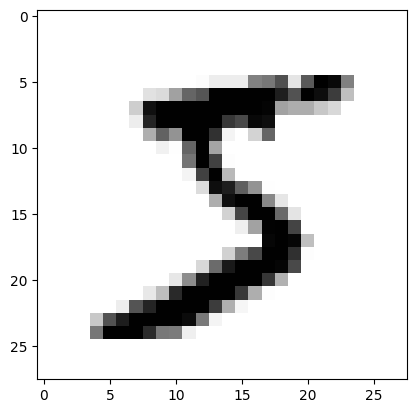

In [9]:
# this basically says there are 70000 imagaes, with each having 28*28=784 features , ie, each feature 
# simply represents one pixel's intensity from 0(white) to 255(black)
# let's see one instance , how it looks: grab instance's feature vector, reshape it to 28*28 array an display using matplotlib
import pandas
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
some_digit=X.iloc[0].to_numpy()
some_digit_image=some_digit.reshape(28,28)
plt.imshow(some_digit_image,cmap="binary")
#plt.axis("off")
plt.show()

In [10]:
y[0]

'5'

In [11]:
# this is what most ml models would need too, converting  the y to integer
import numpy as np
y=y.astype(np.uint8)

In [12]:
X_train,X_test, y_train,y_test=X[:60000],X[60000:],y[:60000],y[60000:]
# mnist initial 60000 images are for training, already split 
# shuffle the training set , for cross validation folds will be similar, some models are sensitive to order of training instances
import numpy as np 
shuffle_index=np.random.permutation(60000)
X_train,y_train=X_train.iloc[shuffle_index],y_train.iloc[shuffle_index]

In [17]:
# model for determining whether it is 5 or not, kinda binary classifer 
y_train_5=(y_train==5)
y_test_5=(y_test==5)

In [21]:
# will see Stochastic Gradient Descent (SGD) classifier, 
# class in scikit learn can handle very large datasets efficiently
# SGD deals with training instances independently, one at a time,i.e., suitable for online learning too
from sklearn.linear_model import SGDClassifier
sgd_clf=SGDClassifier(random_state=42)
#y_train_5=y_train_5.to_numpy().ravel()
sgd_clf.fit(X_train,y_train_5)


SGDClassifier(random_state=42)

In [22]:
# sgd relies on randomness during training so for reproducible results, set the random state parameter
some_digit = X.iloc[0].values.reshape(1, -1)  
sgd_clf.predict(some_digit)

array([ True])

In [23]:
# let's check the performance 
# often it is trickier than evaluating a regressor,
# there are many performance variables and will see them throughout the chapter


In [30]:
# 1. CROSS VALIDATION
    # can implement by slef to have more control
from sklearn.model_selection import StratifiedKFold 
from sklearn.base import clone
skfolds=StratifiedKFold(n_splits=3,random_state=42,shuffle=True)
for train_index,test_index in skfolds.split(X_train,y_train_5):
    clone_clf= clone(sgd_clf)
    X_train_folds=X_train[train_index]
    y_train_folds=y_train_5[train_index]
    X_test_fold=X_train[test_index]
    y_test_fold=y_train_5[test_index]

    clone_clf.fit(X_train_folds,y_train_folds)
    y_pred=clone_clf.predict(X_test_fold)
    n_correct=sum(y_pred==y_test_fold)
    print(n_correct/len(y_pred))    

0.79115
0.90515
0.8864


In [27]:
# STRATIFIED K FOLDS
# 1. Splitting the data into 5 folds for StratifiedKFold cross-validation
# 2. Iterations:
#    Iteration 1: Train on folds 2, 3, 4, 5 → Test on fold 1
#    Iteration 2: Train on folds 1, 3, 4, 5 → Test on fold 2
#    Iteration 3: Train on folds 1, 2, 4, 5 → Test on fold 3
#    Iteration 4: Train on folds 1, 2, 3, 5 → Test on fold 4
#    Iteration 5: Train on folds 1, 2, 3, 4 → Test on fold 5

# 3. Average performance is computed by averaging the results across all 5 validation sets
# 4. Once the cross-validation is complete, we train the final model on the entire dataset
#    This final model will now use all available data (both training and validation data)
#    to improve its learning and generalize better for future predictions.

# essence of the process :
process="""
Recap of the Process:

1.  Cross-Validation: By using cross-validation, you effectively split the dataset into multiple parts, 
    allowing you to train and validate your models in a way that helps prevent overfitting. Each fold serves 
    as a separate validation set, providing insights into how well each model generalizes to unseen data.

2.  Model Selection: The model that performs well across the different folds is likely to be more robust 
    and less likely to overfit because it has been tested against various subsets of the data. This is crucial 
    because it gives you confidence that the model isn’t just memorizing the training data.

3.  Final Model Training: After identifying the best-performing model through cross-validation, you can 
    then train this model on the entire dataset. This final training allows the model to learn from all 
    available data, which can improve its performance even further.

Key Benefits:

*   Reduced Overfitting: Since you are validating the model's performance on different subsets of data, 
    it ensures that the model is generalizing well rather than simply fitting the noise in the training data.

*   Informed Decision-Making: By evaluating multiple models or configurations during cross-validation, 
    you can make informed decisions about which model to finalize, based on their actual performance 
    rather than assumptions or isolated evaluations.

*   Maximizing Data Usage: Training on the full dataset after selecting the best model allows you to 
    leverage all available data for learning, which can enhance predictive power.

Summary:

In essence, cross-validation serves as a safeguard against overfitting and helps you identify the 
most suitable model for your problem. The final training phase then capitalizes on this selection, 
ensuring that the model you deploy is well-trained and effective for making predictions on unseen data.
"""
